# **Homework 2 Problem 3 (15 points) [TA: Sogol Mansouri]** 

In this workshop, you'll looking at evaluation metrics and hyperparameter tuning.

## Instructions:
1. Use github.ncsu.edu to submit your work repository if you have not done so yet. It is your responsbility to ensure the TAs have access to your work before the deadline. Make sure the repo is private.
2. Do not modify the code structure given. Answer the questions in the designated space.

All the best!

# 0 Loading Data and Libraries

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import datasets
# Remember you have to run this cell block before continuing!

# We will use this random seed throughout to make things more deterministic for testing
random_seed = 25

# 1 Complete Pipeline

## 1.1 Loading the Data

In this problem you will learn to calculate accuracy, precision, recall and f1-score for a classifier.

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

raw_data = pd.read_csv('../data/hw2_p3_data.csv')
raw_data

,sentence,sentiment
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0
...,...,...
1523970,just woke up having no school is the best feel...,1
1523971,thewdb com very cool to hear old walt interviews,1
1523972,are you ready for your mojo makeover ask me fo...,1
1523973,happy th birthday to my boo of alll time tupac...,1


We sample a subset of the dataset (stored as "X" and "Y") in order to avoid long running time. Now practice the train/test split function to create a training and testing dataset with the **"random_seed"** we defined at very beginning and the belowed **"test_data_fraction"**

In [3]:
data = raw_data.sample(frac = 0.008, random_state = random_seed)
X = data["sentence"]
Y = data["sentiment"] 

test_data_fraction = 0.2
## TODO: Make the train/test split this time
X_train = None
X_test = None
Y_train = None
Y_test = None
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_data_fraction, random_state=random_seed)


Note that the X features contain just one attribute, a string value from the tweet.

In [4]:
X_train

238396                  i want to but me mum said i couldn t
522284     i just dont want a million texts in the middle...
1398666    god morning friends just steps away from a goo...
12674                   headache and yardwork miserable hell
263812     ah at last just wanted to say was up most of t...
                                 ...                        
955356     great to see u have exciting projects in the w...
1411698    so stop writing and you won t get hungry right...
542542            well done doing an excellent job yet again
329769     oh that s so not cool and i thought my sunshin...
927299     look at imdb pro you could put your photos up ...
Name: sentence, Length: 9753, dtype: object

The y values are 1 (for posiive sentiment) and 0 otherwise.

In [5]:
Y_train

238396     0
522284     0
1398666    1
12674      0
263812     0
          ..
955356     1
1411698    1
542542     0
329769     0
927299     1
Name: sentiment, Length: 9753, dtype: int64

In [6]:
X_test

112391     i m so frustrated it makes no sense heading to...
1213553    i know thats why i offered you the drink i lov...
74772      his updates are blue in termtter so it s hard ...
1348391    is just about to eat a very yummy curry bring ...
273540     i love warm weather but i hate the shoes that ...
                                 ...                        
667180                             i was up at for no reason
622649        omg i know i don t have e though unfortunatley
1181713        i m getting so excited about cpc i can t wait
788067      watching dalmations lol movie date with sky soon
1386901    just got home had an awesome time with my frie...
Name: sentence, Length: 2439, dtype: object

In [7]:
Y_test

112391     0
1213553    1
74772      0
1348391    1
273540     0
          ..
667180     0
622649     0
1181713    1
788067     1
1386901    1
Name: sentiment, Length: 2439, dtype: int64

In [8]:
np.testing.assert_equal(len(X_train),9753)
np.testing.assert_equal(len(Y_test),2439)
np.testing.assert_equal(type(X_test),pd.Series)

## 1.2 Classification Pipeline

In this problem you will create a [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), which is a nice tool provided by sklearn, to apply a list of transforms or model traning sequencially, pipeline class allows sticking multiple processes into a single estimator, it can be used to automate a machine learning workflow that involves multiple steps. For example:

1. We need to extract our TFIDF features from the twitter data.
2. Then we need to build a classifierusing our new TFIDF features.

The advantage of putting these steps together into a pipeline, is that we can apply them repeatedly, e.g. to the training data and the test data.

Additionally, for hyperparameter tuning, we often use k-fold cross validation, where we have many different training/test datasets, making the pipeline even more useful.

Here is a brief example of how to use pipeline function:

In [9]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Put the example in a function so we don't overwrite our variables
def example():
    X, y = make_classification(random_state=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # Create a pipeline composed of a standard scaler, and an SVC classifier
    pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

    # Fit the pipeline to the training data (just like you would any other classifier)
    # Both scaling and fitting will be performed
    pipe.fit(X_train, y_train)

    # Use the fitted pipeline (i.e. the fit scaler and trained classifier) to score the test data
    # This will first scale X_test, then predict y-values for this data, and finally compute accuracy
    accuracy = pipe.score(X_test, y_test)
    print(f"Accuracy: {accuracy}")

example()


Accuracy: 0.88


Now it is your turn to practice the pipeline function, create a pipeline including **1) tfidf vectorizer 2) KNN model (with 5 neighbors)**. Store the pipeline object as **KNN_pipeline**

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier


KNN_pipeline = None
KNN_pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('knn', KNeighborsClassifier(n_neighbors=5))])


In [11]:
np.testing.assert_equal(type(KNN_pipeline),sklearn.pipeline.Pipeline)
np.testing.assert_equal(len(KNN_pipeline.named_steps),2)

Now let's evaluate the knn pipeline, use the training set to train the pipeline and make prediction on the testing set. Compare the result with the true labels of the testing set and calculate the accuracy score. Store the accuracy in the variable **"test_accuracy"** 

In [12]:
from sklearn.metrics import accuracy_score

test_accuracy = None

KNN_pipeline.fit(X_train, Y_train)
test_accuracy = KNN_pipeline.score(X_test, Y_test)
test_accuracy

0.6301763017630176

In [13]:
np.testing.assert_almost_equal(test_accuracy,0.63, decimal=2)

As you can see from the aboved result, the test accuracy is not as good as we expected. Now let's play with some hyperparameter tuning to see whether we can achieve better results with the optimized parameters, choosing the best value for $k$.

Let's take a look at the below example on hyper-parameter tuning of the **KNN_pipeline** we created previously, using the [GridSearchCV](https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html) function. The goal is to find the best value for $k$ (number of neighbors) in the KNN classifier, and we'll test the following values: [1,3,5,7,10].

GridSearchCV will try each of these values, and then determine the best one by performing k-fold crossvalidation _within the training dataset_. If a value of k does well on unseen validation data, it will probably do well with test data.

**HINT**: Select the best hyperparameter value only based on the training data

**Note**: This may take a moment, since the GridSearch performs CV (multiple train/tests splits) with every hyperparameter value, leading to lots of model training and testing.

In [14]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter we hope to tune.
param_grid = {
    "knn__n_neighbors": [1,3,5,7,10]
}
# Run the hyperparameter tuning with the training dataset, this will take a while to run.
KNN_tuned_pipeline = GridSearchCV(KNN_pipeline, param_grid)
KNN_tuned_pipeline.fit(X_train,Y_train)

# Print out the best parameter as well as the cross-validated score of the best_estimator.
print("Best parameter: {}, CV score = {}:".format(KNN_tuned_pipeline.best_params_,KNN_tuned_pipeline.best_score_))

# Now let's make prediction on the testing data with the best found parameters and check whether we can achieve higher accuracy.
print("The testing accuracy with the best parameter is: {}".format(accuracy_score(KNN_tuned_pipeline.predict(X_test), Y_test)))

Best parameter: {'knn__n_neighbors': 10}, CV score = 0.6559025351890548:
The testing accuracy with the best parameter is: 0.6670766707667076


Now it is your turn. Create the similar pipeline (with the TFIDF vectorizer, followed by a model) for the decision tree and adaboost classifiers. Then perform hyperparameter tuning to create a tuned version of each pipeline. Make sure to fit the pipelines with the **training data** you have -- selecting a hyperparameter using the test data gives an unfair advantage.

For [decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), make sure to use the **`random_seed`** we created at very beginning. For the hyperparameter tuning, use the `GridSearchCV` to select the best criterion from **{“gini”, “entropy”}**, and the best  max_depth from **[2,3,4,5]**. 

Make sure to:

1. Create the pipeline
2. Tune it with CV
3. Fit it to the training data

In [15]:
from sklearn.tree import DecisionTreeClassifier

DT_tuned_pipeline = None

DT_param_grid = {
    "dt__criterion": [], #TODO: Update this with parameter values
    "dt__max_depth": [] #TODO: Update this with parameter values
}

DT_pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('dt', DecisionTreeClassifier(random_state=random_seed))])  

# Define the hyperparameters to tune
DT_param_grid = {
    "dt__criterion": ["gini", "entropy"],  # Criterion: gini or entropy
    "dt__max_depth": [2, 3, 4, 5]  # Max depth values to test
}

# Perform GridSearchCV with the parameter grid
DT_tuned_pipeline = GridSearchCV(DT_pipeline, DT_param_grid)  
DT_tuned_pipeline.fit(X_train, Y_train)  

GridSearchCV(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=25))]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [2, 3, 4, 5]})

In [16]:
# Check the best hyperparameters for DecisionTree
print("Best parameter of DT: {}, CV score = {}:".format(DT_tuned_pipeline.best_params_,DT_tuned_pipeline.best_score_))
print("The testing accuracy with the best parameter of DT is: {}".format(accuracy_score(DT_tuned_pipeline.predict(X_test), Y_test)))

Best parameter of DT: {'dt__criterion': 'gini', 'dt__max_depth': 5}, CV score = 0.5778751199253506:
The testing accuracy with the best parameter of DT is: 0.5629356293562936


In [17]:
### BEGIN HIDDEN TESTS
np.testing.assert_almost_equal(accuracy_score(DT_tuned_pipeline.predict(X_test), Y_test),0.562, decimal=3)
np.testing.assert_almost_equal(DT_tuned_pipeline.best_score_,0.577, decimal=3)
### END HIDDEN TESTS

For [Adaboost classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), make sure to use the **`random_seed`** we created at very beginning. For the hyperparameter tuning, use the `GridSearchCV` to select the best `n_estimators` from **[2,3,4]**, and the best  learning_rate from **[0.1,0.01,0.001]**.

In [18]:
from sklearn.ensemble import AdaBoostClassifier


ADABOOST_tuned_pipeline = None

ADABOOST_param_grid = {
    "adaboost__n_estimators": [], #TODO: Update this with parameter values
    "adaboost__learning_rate": [] #TODO: Update this with parameter values
}

ADABOOST_pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('adaboost', AdaBoostClassifier(random_state=random_seed))])

# Define the hyperparameters to tune
ADABOOST_param_grid = {
    "adaboost__n_estimators": [2, 3, 4],  # Number of estimators to test
    "adaboost__learning_rate": [0.1, 0.01, 0.001]  # Learning rates to test
}

ADABOOST_tuned_pipeline = GridSearchCV(ADABOOST_pipeline, ADABOOST_param_grid)  # Use 5-fold cross-validation
ADABOOST_tuned_pipeline.fit(X_train, Y_train)


/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this wa

GridSearchCV(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('adaboost',
                                        AdaBoostClassifier(random_state=25))]),
             param_grid={'adaboost__learning_rate': [0.1, 0.01, 0.001],
                         'adaboost__n_estimators': [2, 3, 4]})

In [19]:
# Check the best hyperparameters for Adaboost
print("Best parameter of ADABOOST: {}, CV score = {}:".format(ADABOOST_tuned_pipeline.best_params_, ADABOOST_tuned_pipeline.best_score_))
print("The testing accuracy with the best parameter of ADABOOST is: {}".format(accuracy_score(ADABOOST_tuned_pipeline.predict(X_test), Y_test)))

Best parameter of ADABOOST: {'adaboost__learning_rate': 0.1, 'adaboost__n_estimators': 3}, CV score = 0.5547025719880666:
The testing accuracy with the best parameter of ADABOOST is: 0.5424354243542435


In [20]:
### BEGIN HIDDEN TESTS
np.testing.assert_almost_equal(accuracy_score(ADABOOST_tuned_pipeline.predict(X_test), Y_test),0.542, decimal=3)
np.testing.assert_almost_equal(ADABOOST_tuned_pipeline.best_score_,0.554, decimal=3)
### END HIDDEN TESTS

## 1.3 Evaluation using `classification_report` 

Sklearn also has a built in function called [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) that will give a handy summary of all the popular classification metrics. You can use this for the later questions.

Below, we give an example of how to use the  function to summarize a model's performance.

Precision, Recall and F1 are reported for **each class separately**. For the "False" row, a False is treated as the positive class. For the "True" row, the "True" is treated as the positive class. This is helpful because Precision and Recall are both sensitive to which class is considered positive. **Support** is the number of instances of both classes.

In [21]:
from sklearn.metrics import classification_report

# Print a classification report for the KNN pipeline we created
print(classification_report(Y_test, KNN_tuned_pipeline.predict(X_test)))

              precision    recall  f1-score   support

           0       0.64      0.77      0.70      1215
           1       0.71      0.57      0.63      1224

    accuracy                           0.67      2439
   macro avg       0.67      0.67      0.66      2439
weighted avg       0.67      0.67      0.66      2439



Now complete the following functions based on the descriptions in the comments.

In [22]:
from sklearn.metrics import classification_report

def predict_with_pipeline(pipeline):
    """ 
    You will implement a pipeline to predict for test-cases that performs the following tasks:
        1. Use the tuned pipeline to predict labels Y_predict for X_test.
        3. return the predictions
        
    Your inputs and outputs are as shown below:
    
    Input:
        
        pipeline: A classification/tuned pipeline. 
              Some example classifiers are: KNN_tuned_pipeline, DT_tuned_pipeline, ADABOOST_tuned_pipeline
        
        
    Output:
        predictions: Return the prediction by the classification pipeline on X_test
    """

    predictions = pipeline.predict(X_test)  # Use the pipeline to predict on X_test
    return predictions
    
def ClassificationReport(Y_test, predictions,output_dict=True):
    """ 
    You will implement this function to outputs the predictions classification report for test-cases that performs the following tasks:
        1. This function will take three parameters:  the Y_test, predictions on X_test using the pipeline, and output_dict for dictionary format report
        2. You can use the sklearn's classification_report function to generate the report
        
        
    Your inputs and outputs are as shown below:
    
    Input:
        
        Y_test: The labels from in the Y_test
        predictions: predictions on X_test using the predict_with_pipeline function.
        output_dict: To generate the report in dictionary format.
        
    return:
        
        classification report  
        
    """
    report = classification_report(Y_test, predictions, output_dict=output_dict)  # Generate classification report
    return report 
    

KNN_predictions = predict_with_pipeline(KNN_tuned_pipeline)

# If output_dict is False, we get a human-readable 
print(ClassificationReport(Y_test, KNN_predictions,output_dict=False))

# Otherwise we can get the report as an object, to get individual values from it
ClassificationReport(Y_test, KNN_predictions,output_dict=True)

              precision    recall  f1-score   support

           0       0.64      0.77      0.70      1215
           1       0.71      0.57      0.63      1224

    accuracy                           0.67      2439
   macro avg       0.67      0.67      0.66      2439
weighted avg       0.67      0.67      0.66      2439



{'0': {'precision': 0.6382978723404256,
  'recall': 0.7654320987654321,
  'f1-score': 0.6961077844311377,
  'support': 1215.0},
 '1': {'precision': 0.709775967413442,
  'recall': 0.5694444444444444,
  'f1-score': 0.6319129646418857,
  'support': 1224.0},
 'accuracy': 0.6670766707667076,
 'macro avg': {'precision': 0.6740369198769338,
  'recall': 0.6674382716049383,
  'f1-score': 0.6640103745365118,
  'support': 2439.0},
 'weighted avg': {'precision': 0.6741687982811275,
  'recall': 0.6670766707667076,
  'f1-score': 0.6638919339095942,
  'support': 2439.0}}

In [23]:
# Public tests
KNN_predictions = predict_with_pipeline(KNN_tuned_pipeline)
KNN_report = ClassificationReport(Y_test, KNN_predictions)
DT_predictions = predict_with_pipeline(DT_tuned_pipeline)
ADABOOST_predictions = predict_with_pipeline(ADABOOST_tuned_pipeline)
DT_report = ClassificationReport(Y_test, DT_predictions)
ADABOOST_report = ClassificationReport(Y_test, ADABOOST_predictions)

np.testing.assert_almost_equal(KNN_report['1']['precision'],0.709480122324159, decimal=3)
np.testing.assert_almost_equal(DT_report['0']['recall'],0.8938271604938272, decimal=3)
np.testing.assert_almost_equal(ADABOOST_report['0']['f1-score'],0.6605839416058393, decimal=3)

In [24]:
### BEGIN HIDDEN TESTS

np.testing.assert_almost_equal(KNN_report['0']['precision'], 0.6378600823045267, decimal=3)
np.testing.assert_almost_equal(DT_report['1']['recall'],0.23447712418300654, decimal=3)
np.testing.assert_almost_equal(ADABOOST_report['1']['f1-score'],0.29811320754716986, decimal=3)

### END HIDDEN TESTS



Now let's print the reports for each classifier:

In [25]:
print('KNN:')
print(ClassificationReport(Y_test, KNN_predictions,output_dict=False))

print('\n')
print('Decision Tree:')
print(ClassificationReport(Y_test, DT_predictions,output_dict=False))

print('\n')
print('Adaboost:')
print(ClassificationReport(Y_test, ADABOOST_predictions,output_dict=False))

KNN:
              precision    recall  f1-score   support

           0       0.64      0.77      0.70      1215
           1       0.71      0.57      0.63      1224

    accuracy                           0.67      2439
   macro avg       0.67      0.67      0.66      2439
weighted avg       0.67      0.67      0.66      2439



Decision Tree:
              precision    recall  f1-score   support

           0       0.54      0.89      0.67      1215
           1       0.69      0.23      0.35      1224

    accuracy                           0.56      2439
   macro avg       0.61      0.56      0.51      2439
weighted avg       0.61      0.56      0.51      2439



Adaboost:
              precision    recall  f1-score   support

           0       0.52      0.89      0.66      1215
           1       0.65      0.19      0.30      1224

    accuracy                           0.54      2439
   macro avg       0.59      0.54      0.48      2439
weighted avg       0.59      0.54      0

We would be most interested in the '1' category as this indicates the positive labels, as well as the accuracy scores. Through this process, you should already got three reports for each of the classifiers. Let's make some comparisons, print the reports for each of the classifiers, and which classifier has a better performance?

**YOUR ANSWER HERE**

By the comparison of these three report, KNN is the best-performing model based on precision, recall, F1-score, and accuracy. It does a better job of identifying the positive class and minimizing both false positives and false negatives compared to the other two models.



## 1.4 Evaluation using ROC Curves

Sklearn has some built in methods for [plotting ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html).

The dataset we'll be using for this exercise is the breast cancer dataset, which is used to tell if a certain individal might have breast cancer or not.

### Plotting ROC Curves 

In this section, you will use sklearn API to compute ROC curves and corresponding AUC value. Specifically, you can use [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) and [roc_auc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) to compute these values.

**Hint** You may also want to take a look at the `predict_proba` function from different models such as [decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict_proba) and [Ada boost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html). You will need to reliy on part of its output since ROC is computed based on proabilities. 

In [26]:
from sklearn import metrics

def roc_auc(model, x_test, y_test):
    """
    In this function, you will need to implement the following steps.
        1. Use model to compute its probability of predicting a sample as positive for each sample in x_test.
        2. Use the computed probability and y_test to compute ROC curve and its AUC value.
        
    Your inputs and outputs are as shown below:
    
    Input:
        model: A sklearn classifier instance in our case a fine tuned classifier. Assuming it has predict_proba() function.
        x_test: A numpy array of shape (n_test_rows, n_attributes) where n_test_rows refers to the number 
              of rows in your target dataset and n_attributes refers to the number of attributes.
        y_test: A numpy array of shape (n_test_rows, ) where n_test_rows refers to the number 
              of rows in your target dataset and n_attributes refers to the number of attributes.
        
    Output:
        fpr: A list of increasing false positive rates as a part of ROC curve.
        tpr: A list of increasing true positive rates as a part of ROC curve.
        thresholds: A list of decreasing thresholds as a part of ROC curve.
        auc: A single float value that is the computed AUC value.
    """
    
    # Step 1: Use the model to compute probability of predicting positive class (1)
    y_proba = model.predict_proba(x_test)[:, 1]  # We take the probabilities for the positive class
    
    # Step 2: Compute the ROC curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba)
    
    # Step 3: Compute the AUC score
    auc = metrics.roc_auc_score(y_test, y_proba)
    
    return fpr, tpr, thresholds, auc
    

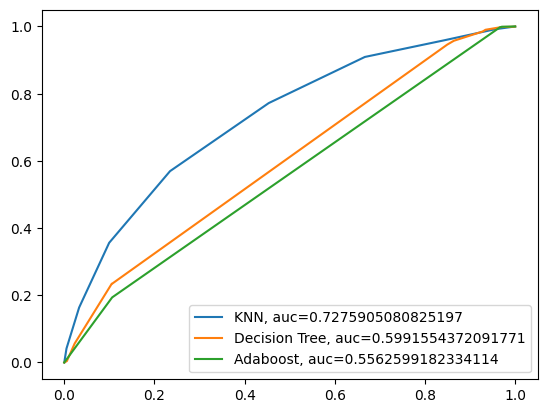

In [27]:
#Plot the ROC curves
tree_fpr, tree_tpr, tree_thresh, tree_auc = roc_auc(DT_tuned_pipeline, X_test, Y_test)
knn_fpr, knn_tpr, knn_thresh, knn_auc = roc_auc(KNN_tuned_pipeline, X_test, Y_test)
ada_fpr, ada_tpr, ada_thresh, ada_auc = roc_auc(ADABOOST_tuned_pipeline, X_test, Y_test)

plt.figure(0).clf()
plt.plot(knn_fpr,knn_tpr,label="KNN, auc="+str(knn_auc))
plt.plot(tree_fpr,tree_tpr,label="Decision Tree, auc="+str(tree_auc))
plt.plot(ada_fpr,ada_tpr,label="Adaboost, auc="+str(ada_auc))

plt.legend(loc=0)

### 2.2 Intepreting ROC curves

Take a look at the above ROC curves. How are they similar? How do they differ? Is one strictly better than the other? In what situations is one better than the other?

**YOUR ANSWER HERE**

Similarities: From the ROC plot, we can see all three curves reflect a trade-off between True Positive Rate (TPR) and False Positive Rate (FPR). As the threshold for positive classification is lowered, both TPR and FPR increase.

Differences:

KNN model has the best overall performance, as evidenced by the highest AUC score (0.7276). Its ROC curve rises sharply in the beginning, indicating a strong ability to classify true positives without increasing false positives early on. This curve is the furthest from the diagonal, indicating better performance.
The Decision Tree has a lower AUC (0.5992) compared to KNN, indicating worse performance. The curve lies closer to the diagonal (the random classifier line). It still performs better than random guessing but not as well as KNN.
The AdaBoost model has the lowest AUC (0.5563). Its ROC curve stays close to the diagonal for most of the plot, indicating that this model struggles to distinguish between the positive and negative classes. This is close to random guessing (AUC = 0.5).
Which Model is Strictly Better: KNN is clearly the best model based on the ROC curve and AUC score. It consistently outperforms the other two models across the different threshold values.

When is One Model Better than Another: KNN: Suitable for situations where prediction accuracy is crucial, and you have a sufficient amount of data that allows KNN to perform well. Decision Tree: Might be more useful when model interpretability is important and you want an easily explainable model. AdaBoost: Might be better in certain cases of imbalanced data or if the weak classifiers are performing well individually. However, in this case, AdaBoost has performed poorly, which could be due to the data or the weak learners used.